In [2]:
# import function
!pip install kaggle
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Z-Score Normalization
from sklearn.preprocessing import StandardScaler

# Robust Normalization
from sklearn.preprocessing import RobustScaler

In [3]:
# Download data in Kaggle
uploaded = files.upload() # kaggle.json
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Setting Permissions of the File (kaggle.json), only readable by the current user
!kaggle competitions download -c groupchallenge-knn-competition-pds
!unzip groupchallenge-knn-competition-pds.zip

Saving kaggle.json to kaggle.json
 97% 186M/193M [00:01<00:00, 137MB/s]
100% 193M/193M [00:01<00:00, 121MB/s]
Archive:  groupchallenge-knn-competition-pds.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
# Data formatting

# For Train
df = pd.read_csv("train.csv", sep=',', dtype=str, skipinitialspace=True)
df = df.fillna(0)
train_array = df.values

# For Test
df = pd.read_csv("test.csv", sep=',', dtype=str, skipinitialspace=True)
df = df.fillna(0)
test_array = df.values

In [5]:
# Change Y, N to 1, 0 in columns 7, 8
train_array[:, 7] = np.where(train_array[:, 7] == "Y", 1, 0)
train_array[:, 8] = np.where(train_array[:, 8] == "Y", 1, 0)
test_array[:, 7] = np.where(test_array[:, 7] == "Y", 1, 0)
test_array[:, 8] = np.where(test_array[:, 8] == "Y", 1, 0)

# Segment IDX
train_array = train_array[1:, :]
test_array = test_array[1:, :]

# Remove mixed alphanumeric data (low-relevance)
delete_columns = [0, 1, 3, 4, 5, 6, 13, 17, 44] #[IDX, id, full_name, pdes, name, prefix, orbit_id, equinox, class]
train_array = np.delete(train_array, delete_columns, axis=1)
test_array = np.delete(test_array, delete_columns, axis=1)

In [6]:
# Creat feature correlation matrix
train_df = pd.DataFrame(train_array.astype("float"))
correlation_matrix = train_df.corr(numeric_only=True)
display(correlation_matrix.style.background_gradient(cmap='YlGnBu').set_properties(2))

# Segment labels and answers
train_data = train_array[:, :-1]
train_label = train_array[:, -1]
test_data = test_array[:, :-1]
test_label = test_array[:, -1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.024690,-0.000071,0.117400,-0.045784,-0.072176,-0.044928,0.006784,0.006784,0.006950,0.010248,0.000162,-0.002087,0.012240,0.003988,0.003827,-0.032921,0.000502,0.001833,-0.002703,-0.002614,0.000172,0.000172,-0.002682,-0.002682,-0.000576,-0.000328,-0.000628,-0.000582,-0.000194,-0.000160,-0.000160,-0.000270,-0.000167,-0.000157,-0.000241,0.009587,0.011638
1,0.024690,1.000000,0.298841,0.420817,-0.027980,-0.029942,-0.029357,-0.113752,-0.113752,-0.114614,0.486205,-0.007037,-0.107702,0.082756,0.007377,0.000336,-0.007591,-0.004557,0.554812,-0.049011,-0.049233,-0.000753,-0.000753,-0.093858,-0.093858,-0.001183,-0.000550,-0.001026,-0.001188,-0.000589,-0.000251,-0.000251,-0.000447,-0.000669,-0.000247,-0.000447,0.004126,0.503672
2,-0.000071,0.298841,1.000000,0.068161,-0.007757,0.000072,-0.007791,-0.009926,-0.009926,-0.009939,0.191535,-0.002158,-0.035647,0.034357,0.001393,-0.000433,0.001732,-0.001168,0.172417,-0.003709,-0.003844,-0.000245,-0.000245,-0.029574,-0.029574,-0.000352,-0.000164,-0.000307,-0.000274,-0.000172,-0.000075,-0.000075,-0.000134,-0.000187,-0.000074,-0.000134,-0.001114,0.117161
3,0.117400,0.420817,0.068161,1.000000,-0.271232,-0.287932,-0.204392,0.120934,0.120934,0.117301,0.278863,-0.039272,-0.344431,-0.133779,-0.002590,-0.002462,-0.038532,-0.050865,0.455683,0.065595,0.065117,-0.011352,-0.011352,-0.343616,-0.343616,-0.024181,-0.013108,-0.025864,-0.031411,-0.009231,-0.005888,-0.005888,-0.010464,-0.016772,-0.005774,-0.009887,0.004634,0.156296
4,-0.045784,-0.027980,-0.007757,-0.271232,1.000000,0.282739,0.489334,0.021099,0.021099,0.021246,-0.036387,0.002665,0.026339,0.054043,0.002128,0.000948,0.012276,0.002313,-0.088485,0.006977,0.007002,-0.000122,-0.000122,0.028649,0.028649,-0.001273,-0.000649,-0.001220,-0.001043,-0.000408,-0.000305,-0.000305,-0.000531,0.000000,-0.000299,-0.000539,-0.002396,-0.017166
5,-0.072176,-0.029942,0.000072,-0.287932,0.282739,1.000000,0.315335,0.030135,0.030135,0.030354,-0.038370,-0.002366,-0.014884,0.031807,0.002463,-0.000620,0.020148,-0.004030,-0.002183,0.017794,0.017710,-0.000985,-0.000985,-0.011299,-0.011299,-0.001999,-0.001024,-0.001925,-0.001616,-0.000608,-0.000481,-0.000481,-0.000837,0.000164,-0.000472,-0.000851,-0.002885,-0.048589
6,-0.044928,-0.029357,-0.007791,-0.204392,0.489334,0.315335,1.000000,0.002302,0.002302,0.002674,-0.030274,0.003428,0.028550,0.051001,0.000595,-0.000028,0.005840,0.003550,-0.078485,-0.010338,-0.010372,0.000040,0.000040,0.031002,0.031002,-0.001095,-0.000657,-0.001254,-0.000146,0.000067,-0.000322,-0.000322,-0.000541,0.001376,-0.000316,-0.000565,-0.000778,-0.020516
7,0.006784,-0.113752,-0.009926,0.120934,0.021099,0.030135,0.002302,1.000000,1.000000,0.999600,-0.099373,-0.008184,-0.062242,-0.056405,-0.005350,-0.000526,-0.000106,-0.010442,-0.053474,0.438017,0.437578,-0.002202,-0.002202,-0.061508,-0.061508,-0.062545,-0.032359,-0.060125,-0.065657,-0.024913,-0.014809,-0.014808,-0.026635,-0.028430,-0.014517,-0.024144,0.006313,-0.123108
8,0.006784,-0.113752,-0.009926,0.120934,0.021099,0.030135,0.002302,1.000000,1.000000,0.999600,-0.099373,-0.008184,-0.062242,-0.056405,-0.005350,-0.000526,-0.000106,-0.010442,-0.053474,0.438017,0.437578,-0.002202,-0.002202,-0.061508,-0.061508,-0.062545,-0.032359,-0.060125,-0.065657,-0.024913,-0.014809,-0.014808,-0.026635,-0.028430,-0.014517,-0.024144,0.006313,-0.123108
9,0.006950,-0.114614,-0.009939,0.117301,0.021246,0.030354,0.002674,0.999600,0.999600,1.000000,-0.100676,-0.007772,-0.061945,-0.055749,-0.004644,-0.000619,0.000192,-0.010295,-0.053917,0.437792,0.437389,-0.002016,-0.002016,-0.061395,-0.061395,-0.062414,-0.032192,-0.060116,-0.065465,-0.024990,-0.014850,-0.014849,-0.026446,-0.028273,-0.014559,-0.023961,0.006292,-0.123633


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

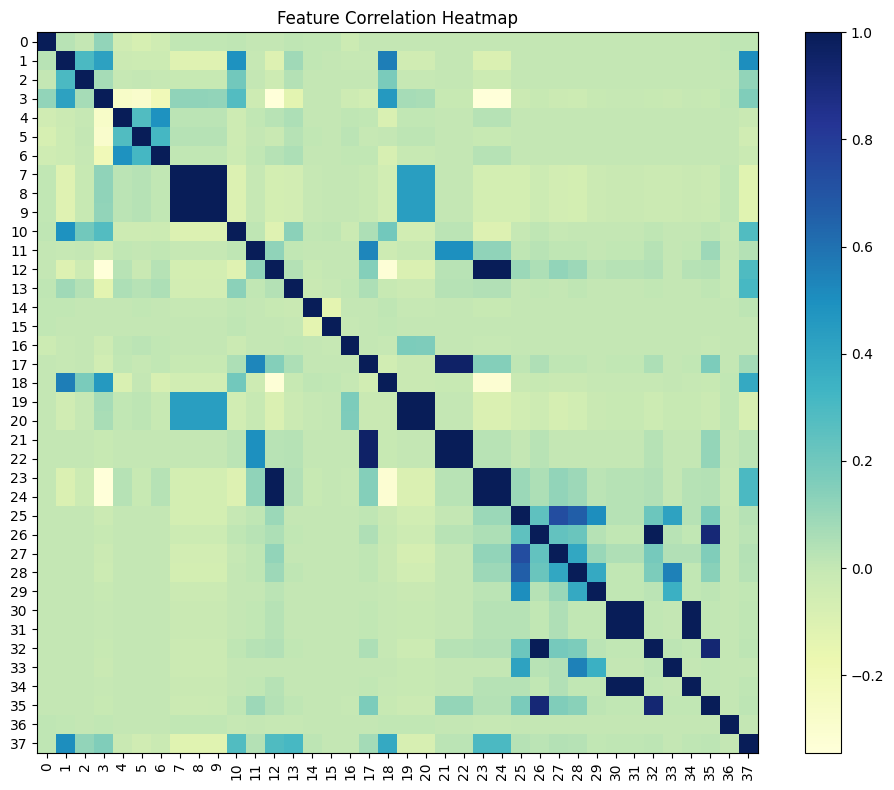

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.title('Feature Correlation Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
files.download('correlation_heatmap.png')

In [7]:
# Select features with higher correlation
reserved_column = [1, 10, 12, 13, 18, 23, 24] #[neo, e, q, i, n, moid, moid_ld]
train_data = train_data[:, reserved_column]
test_data = test_data[:, reserved_column]

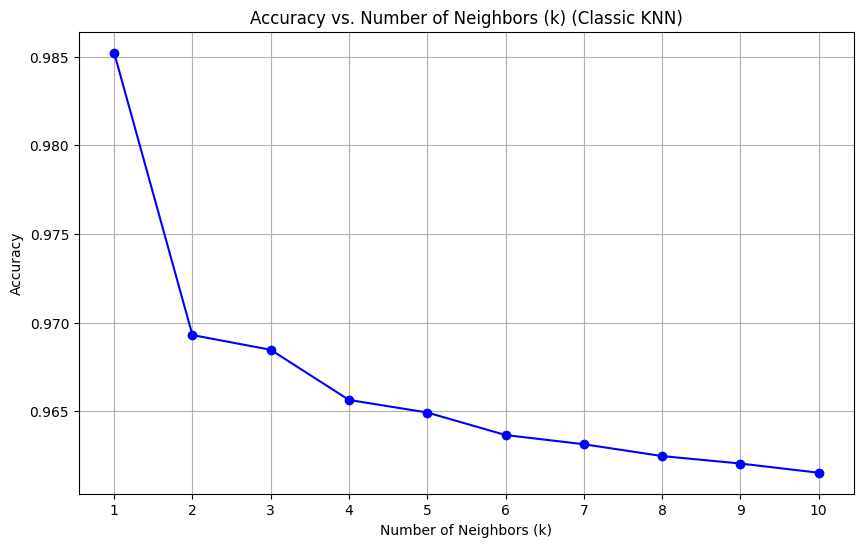

In [10]:
# Train & Predict (None)

accuracies = []
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_data, train_label)
  test_pred_none = knn.predict(test_data)
  accuracy = accuracy_score(test_label, test_pred_none)
  accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) (Classic KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [11]:
print(accuracies)

[0.9852202701386861, 0.9693033704739251, 0.9684722280181948, 0.9656449526353128, 0.9649355256019697, 0.9636662076256451, 0.9631480476846249, 0.9624803516532432, 0.9620595640501328, 0.9615414041091127]


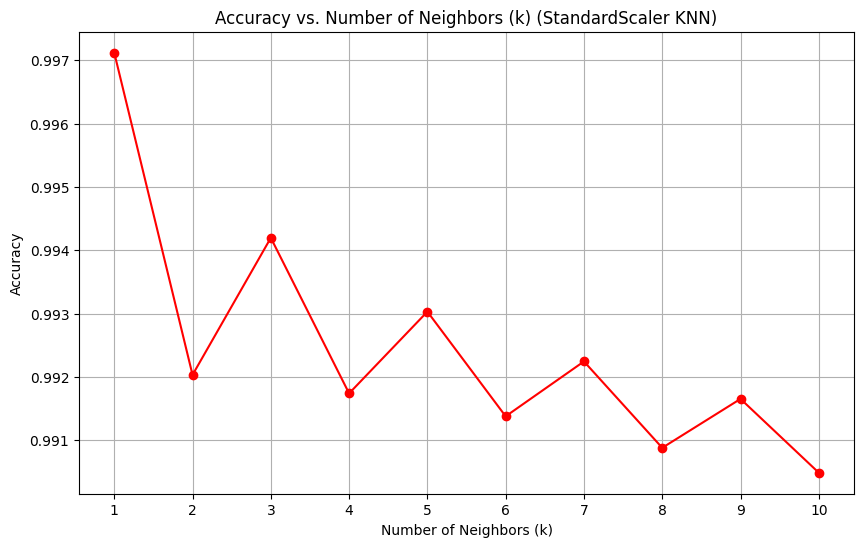

Accuracy:  [0.9971170832811695, 0.9920328562088776, 0.9941959131438746, 0.991740739195148, 0.9930309226724534, 0.991379070511483, 0.9922449888021811, 0.9908817760714435, 0.9916537996077286, 0.9904888091363073]


In [15]:
# Train & Predict (StandardScaler)

scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

accuracies_Standard = []
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_train_data, train_label)
  test_pred_standard = knn.predict(scaled_test_data)
  accuracy = accuracy_score(test_label, test_pred_standard)
  accuracies_Standard.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies_Standard, marker='o', linestyle='-', color='r')
plt.title('Accuracy vs. Number of Neighbors (k) (StandardScaler KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

print("Accuracy: ", accuracies_Standard)

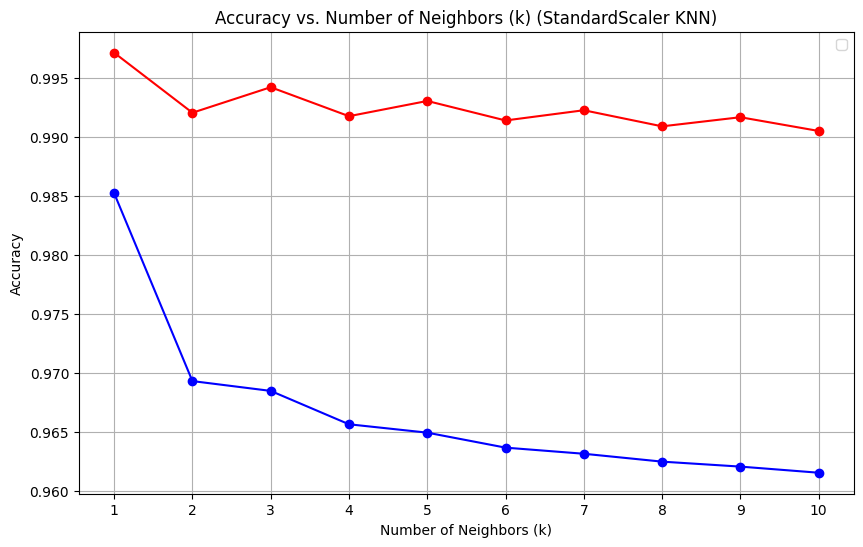

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies_Standard, marker='o', linestyle='-', color='r')
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) (StandardScaler KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.legend()
plt.show()


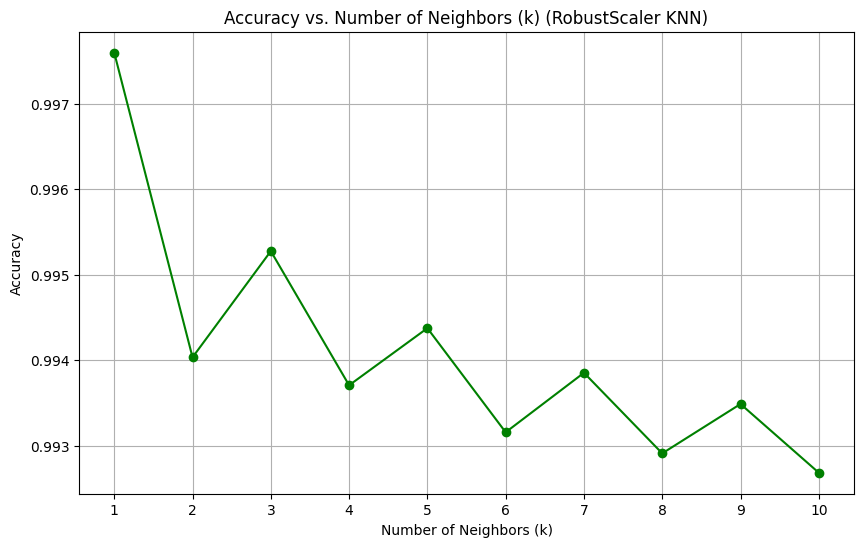

Accuracy:  [0.9975969898037252, 0.9940359443030227, 0.9952774416113731, 0.9937090514543254, 0.9943767474857071, 0.9931595932618342, 0.9938551099611902, 0.9929126848335629, 0.9934899636940283, 0.9926866419062722]


In [14]:
# Train & Predict (RobustScaler)

scaler = RobustScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

accuracies_Robust = []
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_train_data, train_label)
  test_pred_Robust = knn.predict(scaled_test_data)
  accuracy = accuracy_score(test_label, test_pred_Robust)
  accuracies_Robust.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies_Robust, marker='o', linestyle='-', color='g')
plt.title('Accuracy vs. Number of Neighbors (k) (RobustScaler KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

print("Accuracy: ", accuracies_Robust)

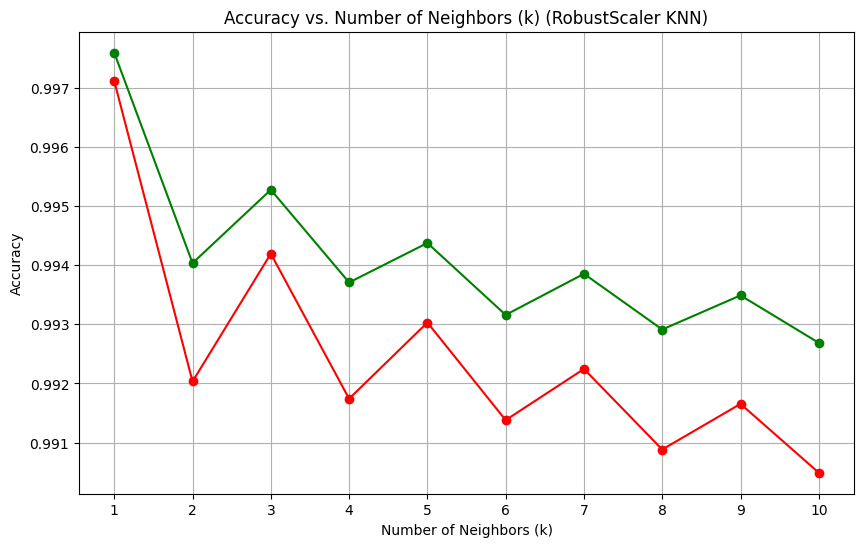

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies_Robust, marker='o', linestyle='-', color='g')
plt.plot(range(1, 11), accuracies_Standard, marker='o', linestyle='-', color='r')
plt.title('Accuracy vs. Number of Neighbors (k) (RobustScaler KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.legend
plt.show()

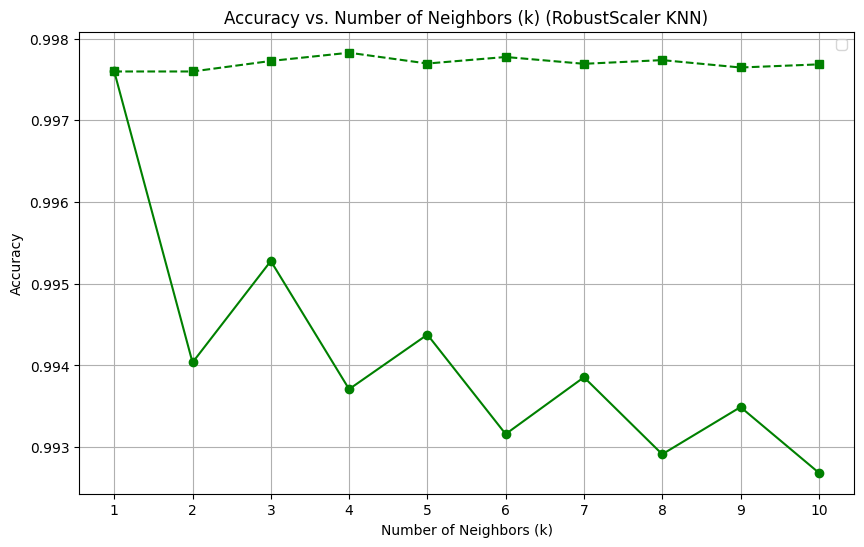

Accuracy:  [0.9975969898037252, 0.9975969898037252, 0.9977256603931061, 0.9978265103145126, 0.997694362141635, 0.997774346562061, 0.9976908845581383, 0.9977360931435963, 0.9976456759726801, 0.9976839293911447]


In [16]:
# Train & Predict (RobustScaler + Weight)

scaler = RobustScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

accuracies_Robust_weight = []
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
  knn.fit(scaled_train_data, train_label)
  test_pred_Robust_weight = knn.predict(scaled_test_data)
  accuracy = accuracy_score(test_label, test_pred_Robust_weight)
  accuracies_Robust_weight.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies_Robust, marker='o', linestyle='-', color='g')
plt.plot(range(1, 11), accuracies_Robust_weight, marker='s', linestyle='--', color='g')
plt.title('Accuracy vs. Number of Neighbors (k) (RobustScaler KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.legend()
plt.show()

print("Accuracy: ", accuracies_Robust_weight)

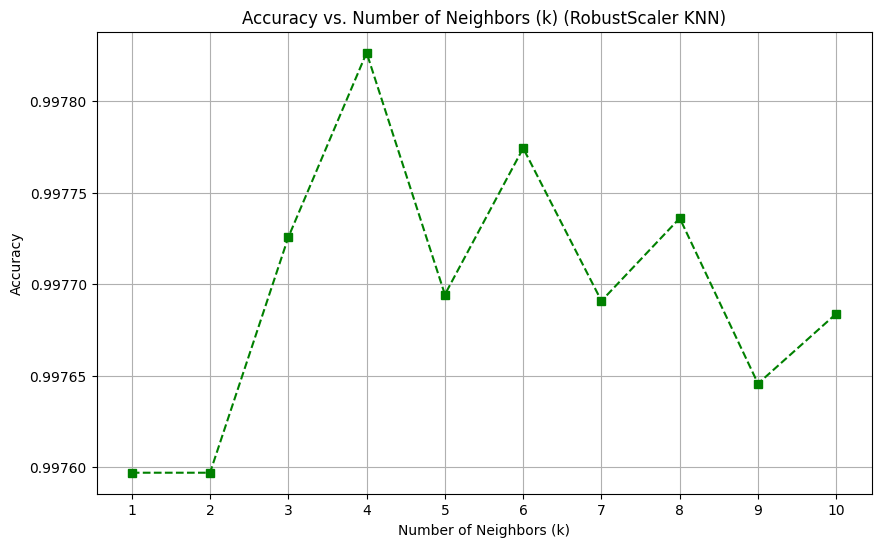

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies_Robust_weight, marker='s', linestyle='--', color='g')
plt.title('Accuracy vs. Number of Neighbors (k) (RobustScaler KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [37]:
# Save as .csv file

pred = test_pred_Robust_weight
idx_values = np.arange(len(pred))
result = np.column_stack((idx_values, pred))
result = pd.DataFrame(result, columns=['IDX', 'Target'])
result.to_csv('test_pred_Robust_weight.csv', index=False)
files.download('test_pred_Robust_weight.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>